In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import tensorflow as tf
from tensorflow import keras

C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\New Owner\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Futu

In [4]:
fashion = keras.datasets.fashion_mnist

In [11]:
(train_images, train_labels), (test_images,test_labels) = tf.keras.datasets.fashion_mnist.load_data()

In [13]:
class_names = ['T-shirt/top', 'Trouser','Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

In [14]:
train_images.shape

(60000, 28, 28)

In [15]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [16]:
test_images.shape

(10000, 28, 28)

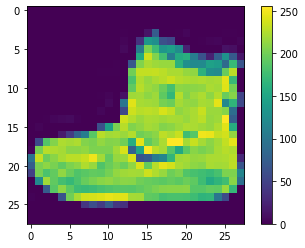

In [17]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
train_images = train_images/255
test_images = test_images/255

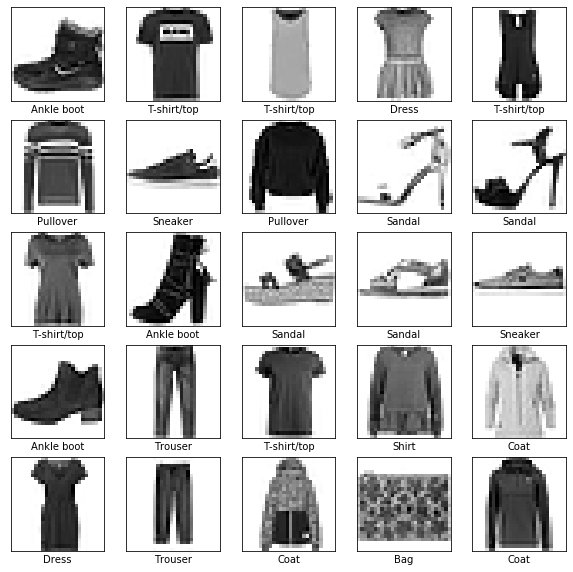

In [19]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [20]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation = tf.nn.relu),
    keras.layers.Dense(10, activation = tf.nn.softmax)
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [22]:
model.compile(optimizer='adam',
             loss ='sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [23]:
model.fit(train_images, train_labels, epochs =10)

Epoch 1/10
60000/60000 [==============================] - 29s 489us/sample - loss: 0.5027 - acc: 0.8225
Epoch 2/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3757 - acc: 0.8644
Epoch 3/10
60000/60000 [==============================] - 14s 239us/sample - loss: 0.3386 - acc: 0.8766
Epoch 4/10
60000/60000 [==============================] - 12s 206us/sample - loss: 0.3153 - acc: 0.8845
Epoch 5/10
60000/60000 [==============================] - 12s 200us/sample - loss: 0.2953 - acc: 0.8923
Epoch 6/10
60000/60000 [==============================] - 13s 209us/sample - loss: 0.2809 - acc: 0.8960
Epoch 7/10
60000/60000 [==============================] - 13s 221us/sample - loss: 0.2701 - acc: 0.8989
Epoch 8/10
60000/60000 [==============================] - 13s 220us/sample - loss: 0.2586 - acc: 0.9041
Epoch 9/10
60000/60000 [==============================] - 13s 212us/sample - loss: 0.2499 - acc: 0.9079
Epoch 10/10
60000/60000 [==============================] - 12s 2

In [24]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:' , test_acc)

10000/10000 [==============================] - 3s 295us/sample - loss: 0.3392 - acc: 0.8811
Test accuracy: 0.8811


In [25]:
predictions = model.predict(test_images)

In [26]:
predictions[0]

array([1.6812295e-06, 2.8867360e-11, 9.1596533e-08, 2.8498294e-08,
       1.2646795e-07, 1.4560124e-02, 2.0461323e-07, 6.9917226e-03,
       6.5250953e-07, 9.7844529e-01], dtype=float32)

In [27]:
np.argmax(predictions[0])

9

In [33]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img= predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label ==true_label:
        color='blue'
    else:
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]),
                                        color=color)
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = '#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')
                       
    

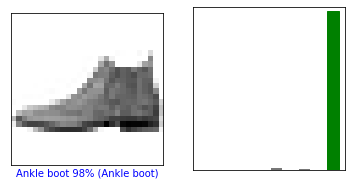

In [34]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

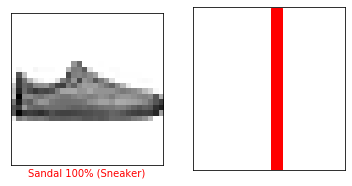

In [35]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

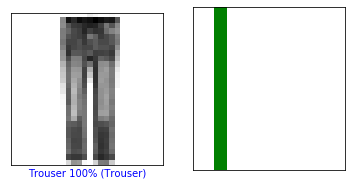

In [36]:
i = 15
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

In [37]:
num_rows =5
num_cols =3

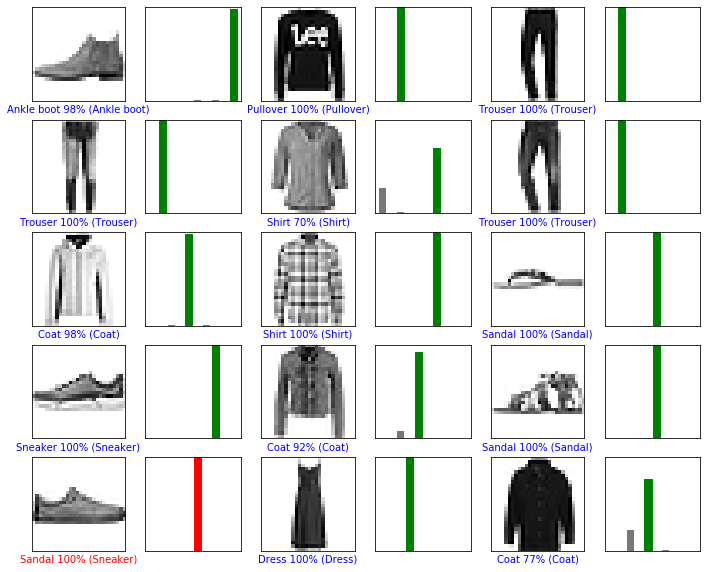

In [38]:
num_images = num_rows*num_cols
plt.figure(figsize= (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()